<a href="https://colab.research.google.com/github/jihyunjeongme/data-analysis-kaggle/blob/master/%5BKaggle_Titanic%5D_EDA_To_prediction(DieTanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 - EDA To Prediction(DieTanic)
- https://www.kaggle.com/ash316/eda-to-prediction-dietanic
- https://kaggle-kr.tistory.com/17?category=868316

In [0]:
# 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn')
# plt.style.use('fivethirtyeight')
sns.set(font_scale=2.5)
# 위 두줄은 matplotlib의 기본 scheme말고 seavorn scheme을 세팅하고, 
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용하면 편합니다.

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [104]:
# test, traing set 데이터 불러오기

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [105]:
cd /content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/Titanic

/content/gdrive/My Drive/Colab Notebooks/dataanalysis/kaggle/Titanic


In [106]:
df_train=pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape

(891, 12)

In [107]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
df_train.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

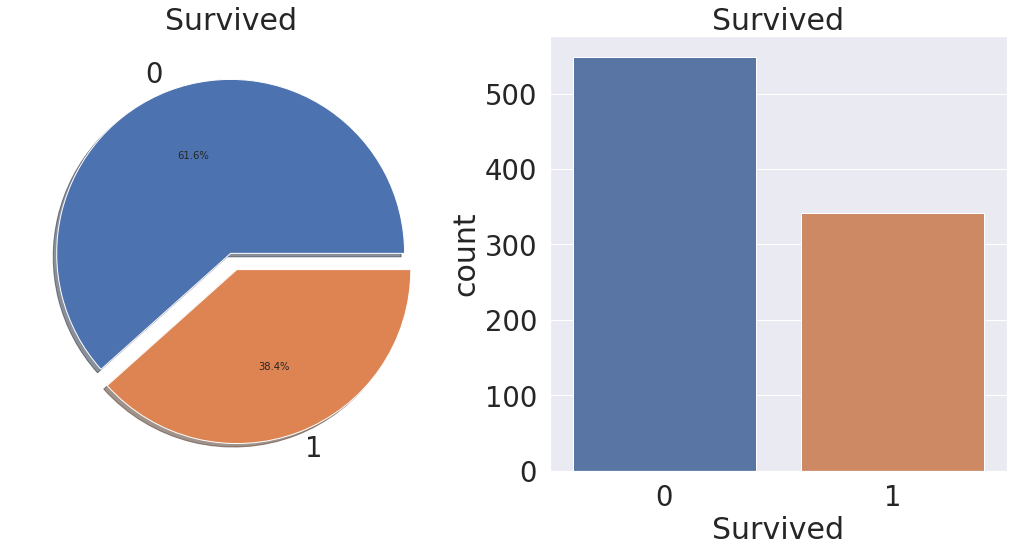

In [110]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [0]:
# 1: 살아남음, 0: 죽음
# 38.4% 가 살아남음

In [0]:
# EDA
# Pclass
# categorial(범주형이면서 순서가 있음)

In [113]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [114]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [115]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


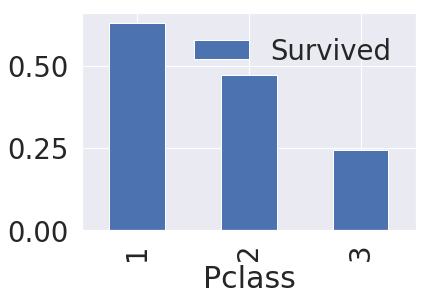

In [116]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [0]:
# 위에 보다 시피 Pclass가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.

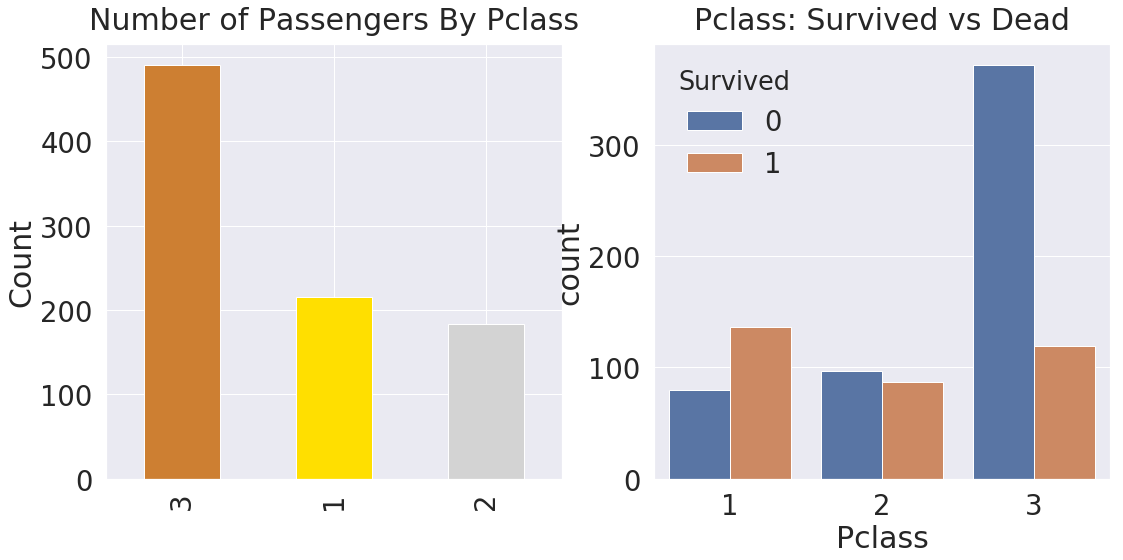

In [118]:
# seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있습니다.

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


In [0]:
# 우리는 생존에 Pclass가 큰 영향을 미친다고 생각해볼 수 있으며, 
# 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단할 수 있습니다.

In [0]:
# Sex
# 이번에는 성별로 생존률이 어떻게 달라지는지 확인해보겠습니다.
# pandas groupby와 seaborn countplot을 사용하여 시각화해봅시다.

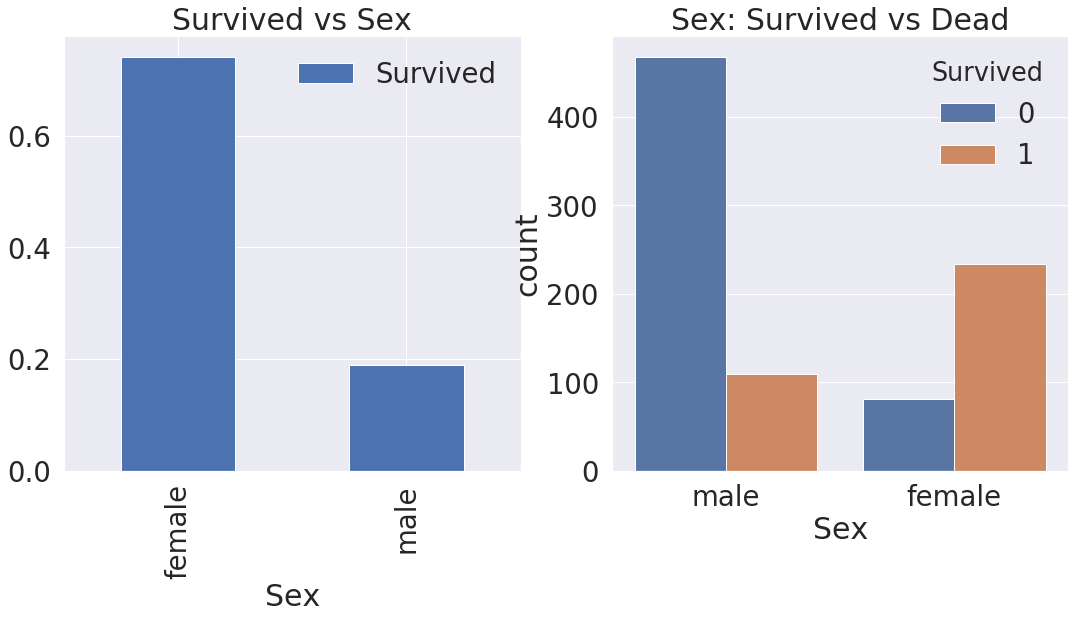

In [121]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].set_title('Survived vs Sex')
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
plt.show()

In [122]:
# 보시다 시피, 여자가 생존할 확률이 높다.

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [123]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [0]:
# Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature 임을 알 수 있음.

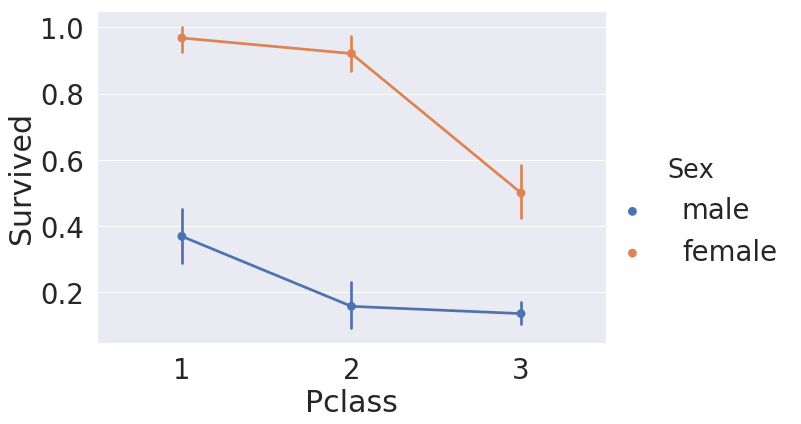

In [125]:
# Both Sex and Pclass
# Sex, Pclass 두가지에 관하여 생존이 어떻게 달라지는 지 확인
# seaborn의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있음.

sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

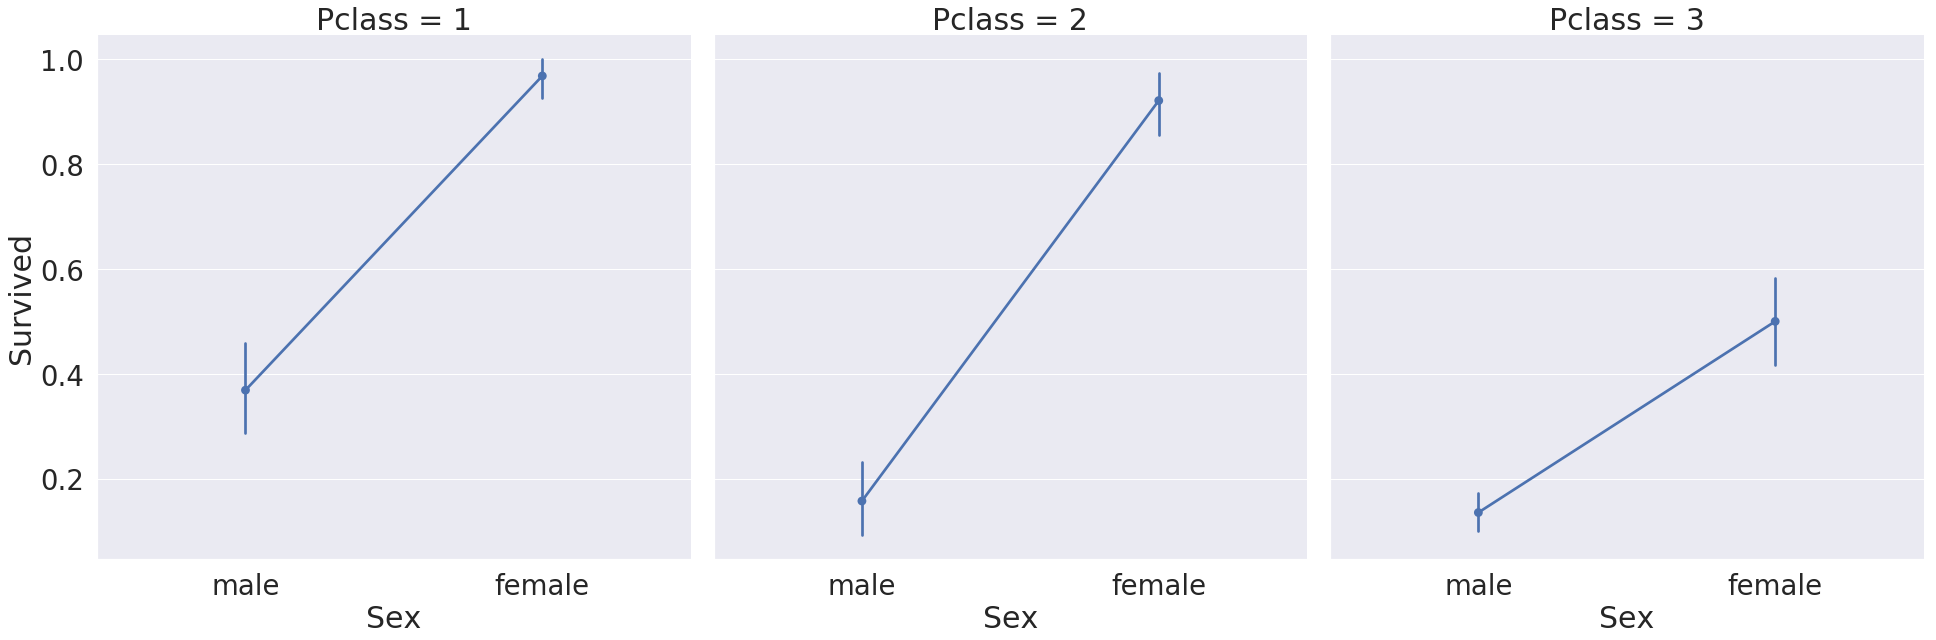

In [126]:
# 모든 클래스에서 female이 살 확률이 male 보다 높은 걸 알 수 있음.
# 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높음.
# 위 그래프는 hue 대신 column으로 하면 아래와 같아짐


sns.factorplot(x='Sex', y='Survived', col='Pclass',data=df_train, satureation=.5,
size=9, aspect=1)
              

In [127]:
# Age
# 이번에는 Age feature를 살펴봅시다.

print("제일 나이 많은 탑승객: {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객: {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


In [0]:
# 생존에 따른 Age의 histogram을 그려보겠습니다.

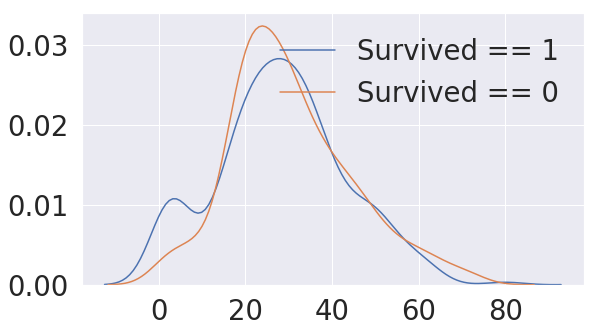

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [0]:
# 생존자가 나이가 어린 경우가 많음

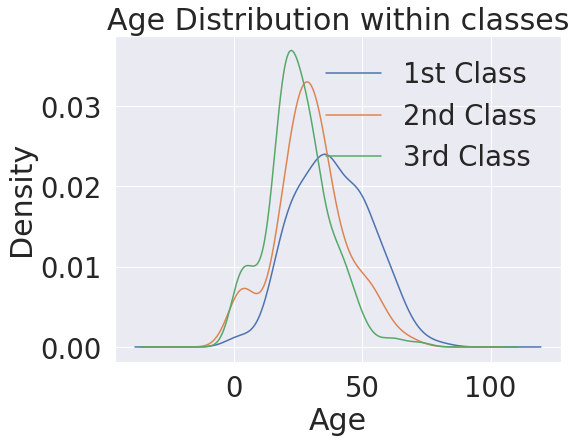

In [131]:
# Age distribution within classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])


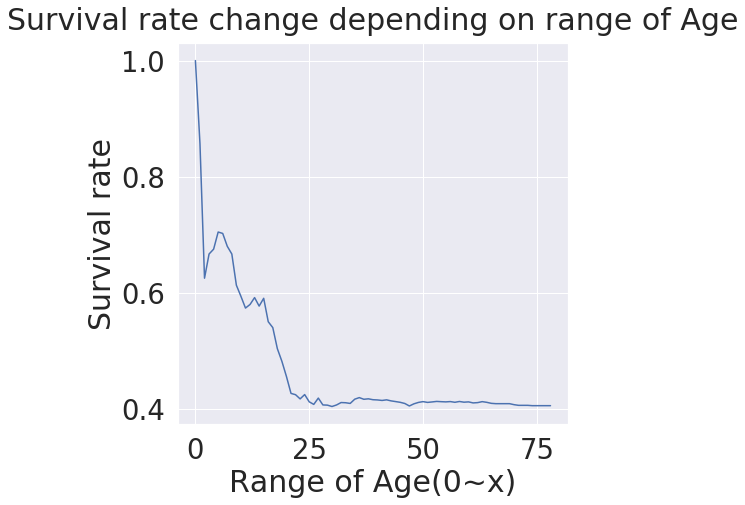

In [132]:
# Class가 높을 수록 나이 많은 사람의 비중이 커짐
# 나이대가 변하면서 생존률이 어떻게 되는 지 보려고 합니다.
# 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 한번 봅시다.

cummulate_survival_ratio = []
for i in range(1, 80):
  cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)

plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [0]:
# 나이가 어릴 수록 생존률이 확실히 높은 것을 확인 
# 나이가 중요한 feature로 쓰일 수 있음을 확인

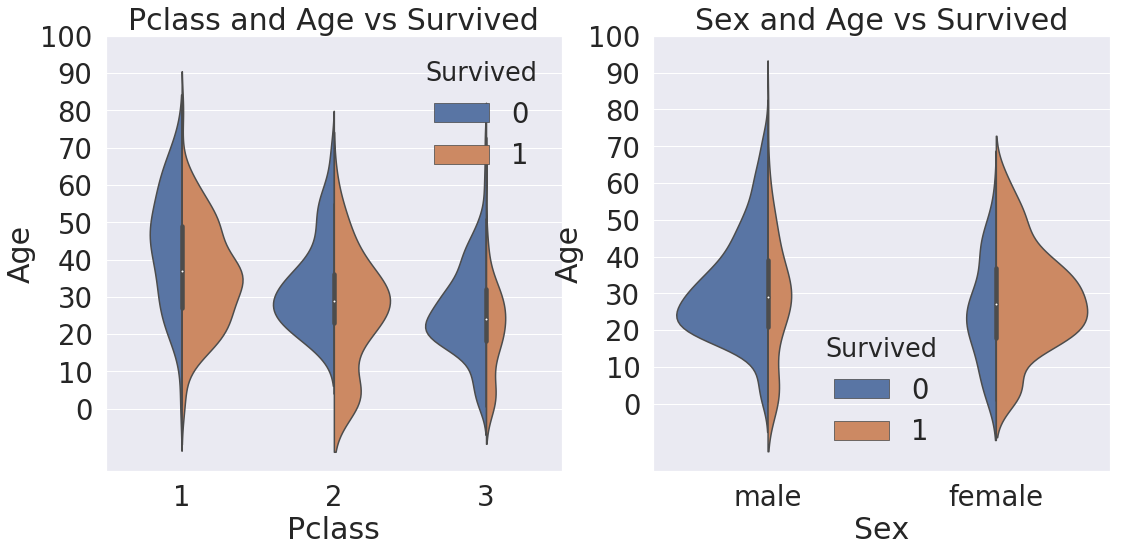

In [134]:
# Pclass, Sex, Age
# 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해서 보고싶음.
# 이를 쉽게 그려주는 것이 seaborn의 violinplot 입니다.
# x 축은 우리가 나눠서 보고싶어하는 case(여시선 Pclass, Sex)를 나타내고, 
# y 축은 보고싶은 하는 distribution(Age)

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [0]:
# 왼쪽 그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존여부에 따라 구분
# 오른쪽 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프
# 생존만 봤을 때, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한것을 볼 수 있음.
# 명확히 여자가 생존을 많이 한 것을 볼 수 있음.

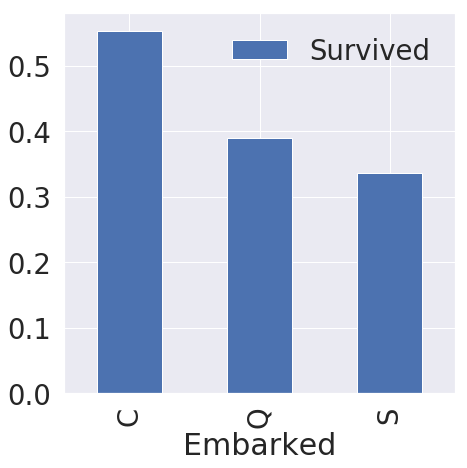

In [136]:
# Embarked
# Embarked 는 탑승한 항구를 나타냅니다.
# 탑승한 곳에 따른 생존률을 보겠습니다.

f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [0]:
# 조금의 차이는 있지만 생존률은 좀 비슷한 거 같음. 그래도 C가 제일 높음
# 모델에 얼마나 큰 영향을 미칠지는 모르겠지만, 그래도 사용
# 모델을 만들고 나면 우리가 사용한 feature 들이 얼마나 중요한 역활을 했는지 확인 해 볼 수 있음.
# 추후에 모델을 만들고 난 다음에 살펴볼 것임.
# 다른 feature로 split 하여 한번 살펴보겠습니다.

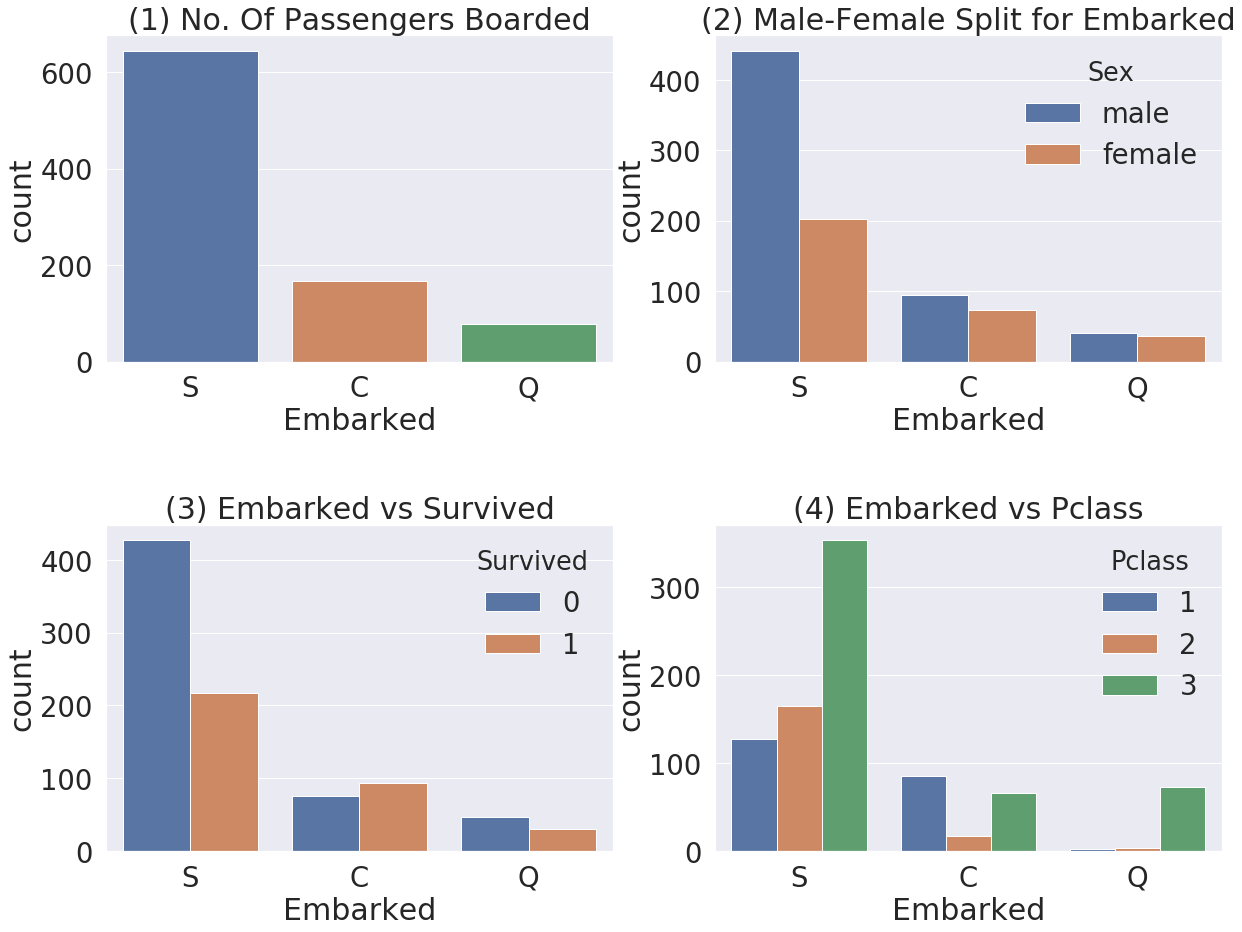

In [138]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', data=df_train, ax=ax[0,0]) # 왼쪽 첫번째

ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])

ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])

ax[1,1].set_title('(4) Embarked vs Pclass')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [0]:
# S에서 가장 많은 사람이 탑승
# C와 Q는 남녀 비율이 비슷, S는 남자가 더 많음
# 생존확률이 S 경우 많이 낮음
# C가 생존 확률이 높은건 Pclass가 높은 사람이 많이 타서 그렇고, S는 3rd class가 많아서 생존확률이 낮게 나옴.

In [0]:
# Family - SibSp(형제 자매) + Parch(부모, 자녀)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [141]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


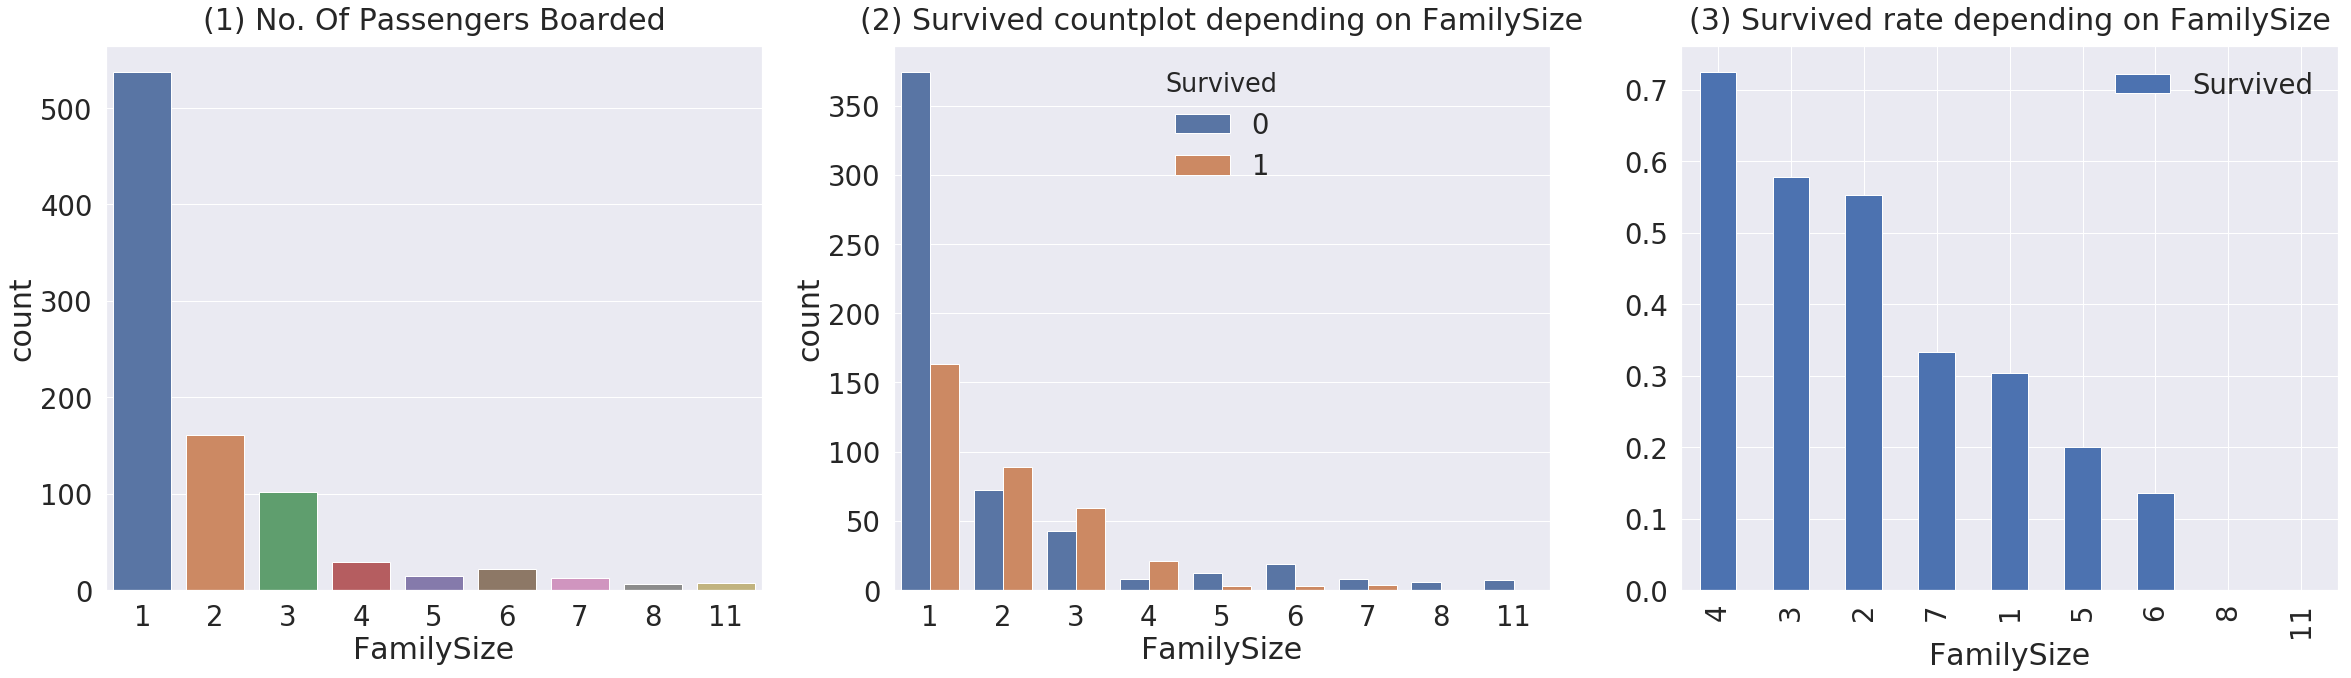

In [142]:
# FamilySize와 생존의 관계를 한번 살펴봅시다.
f, ax=plt.subplots(1, 3, figsize=(40,10))

ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot('FamilySize', data=df_train, ax=ax[0])

ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])

ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [0]:
# Figure(1) - 가족 크기가 1~11까지 있음. 대부분 1명
# Figure(2), (3) - 가족 크기에 따른 생존비교, 가족이 4명인 경우가 가장 생존확률이 높음
# 3~4명 선에서 생존확률이 높음

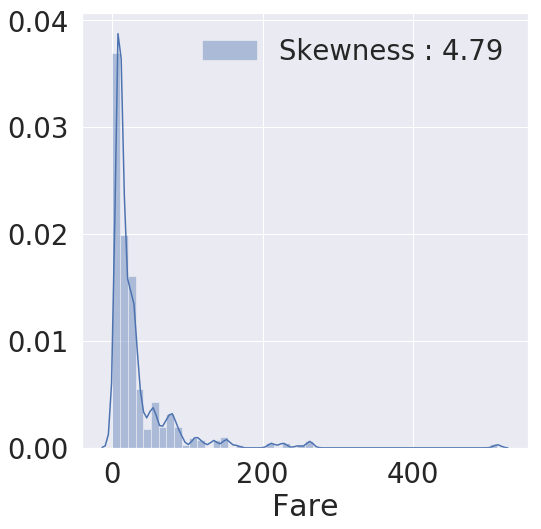

In [144]:
# Fare
# 탑승요금이며, contious feature
# historygram을 그려봄

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label=
               'Skewness : {:.2f}'.format(df_train['Fare'].skew()),
               ax=ax)
g = g.legend(loc='best')

In [0]:
# distribution이 매우 비대칭(high skewness)
# 이대로 모델을 넣어줄 경우 자칫 모델이 잘못 학습 할 수 있음.
# outlier의 영향을 줄이기 위해 Fare에 log를 취함
# pandas의 유용한 기능, dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면
# map, 또는 apply를 사용하면 매우 손쉽게 적용 가능

# 우리가 원하는 것 Fare columns의 데이터 모두를 log 값 취하는 것
# lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map에 인수로 넣어주면
# Fare columns 데이터에 그대로 적용 됨

In [0]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
# testset에 있는 nan value를 평균값으로 치환함

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)


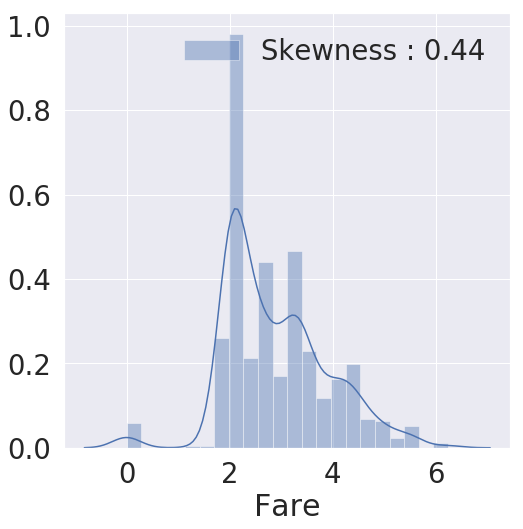

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [0]:
# log를 취하니, 비대칭성이 많이 사라짐
# 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있음.
# 위와 같은 작업을 feature engineering 이라고 함

In [0]:
# Cabin
# NaN이 대략 80%이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않음.
# 그러므로 우리가 세유려는 모델에 포함시키지 않도록 함

In [150]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [151]:
# Ticket
# 이 feature는 NaN은 없습니다. 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 
# 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요함.

df_train['Ticket'].value_counts()

CA. 2343              7
347082                7
1601                  7
CA 2144               6
347088                6
3101295               6
382652                5
S.O.C. 14879          5
LINE                  4
113760                4
113781                4
349909                4
PC 17757              4
17421                 4
2666                  4
4133                  4
19950                 4
W./C. 6608            4
347077                4
24160                 3
SC/Paris 2123         3
29106                 3
PC 17755              3
PC 17582              3
239853                3
371110                3
C.A. 31921            3
PC 17760              3
110413                3
248727                3
                     ..
248740                1
PC 17595              1
345781                1
SOTON/O.Q. 3101307    1
C.A. 24580            1
26707                 1
SOTON/OQ 392086       1
345769                1
2694                  1
112053                1
347085          

In [0]:
# 보시다 시피, ticket number는 매우 다양
# 여기서 어떤 특징을 이끌어내서 생존과 연결 시킬 수 있을까요?
# 이 튜토리얼에서는 튜토리얼이니 일단 ticket은 넘기도록 하겠습니다.